In [1]:
# Import necessary libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import plotly.express as px

In [2]:
df=pd.read_excel('/content/cleaned_Airbnb_dataset.xlsx')

<ipython-input-4-1fb070eba4a0>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="room type", y="availability 365", data=df, palette="muted")
<ipython-input-4-1fb070eba4a0>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="room type", y="price", data=df, palette="muted", scale="count")
<ipython-input-4-1fb070eba4a0>:57: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.
  sns.violinplot(x="room type", y="price", data=df, palette="muted", scale="count")


Visualizations created and saved.


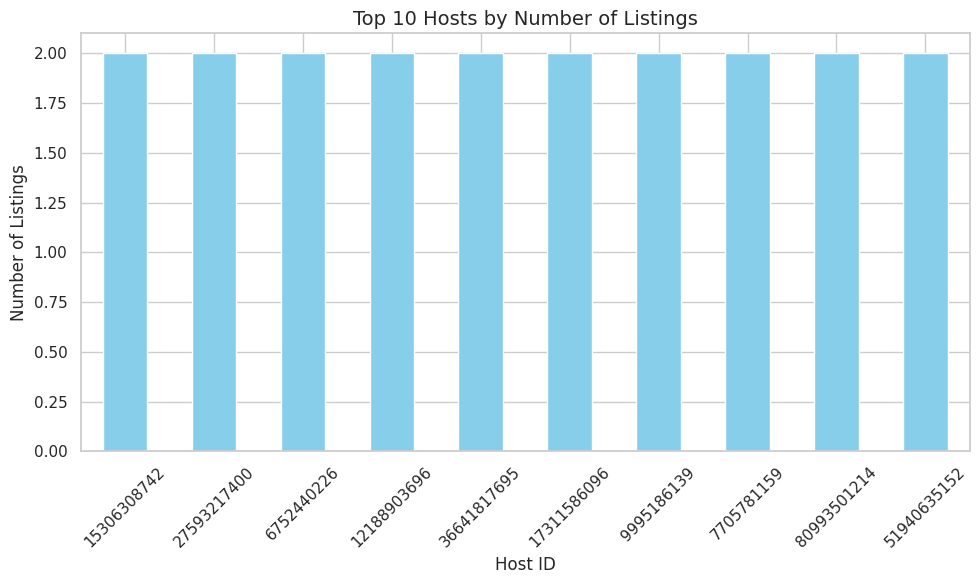

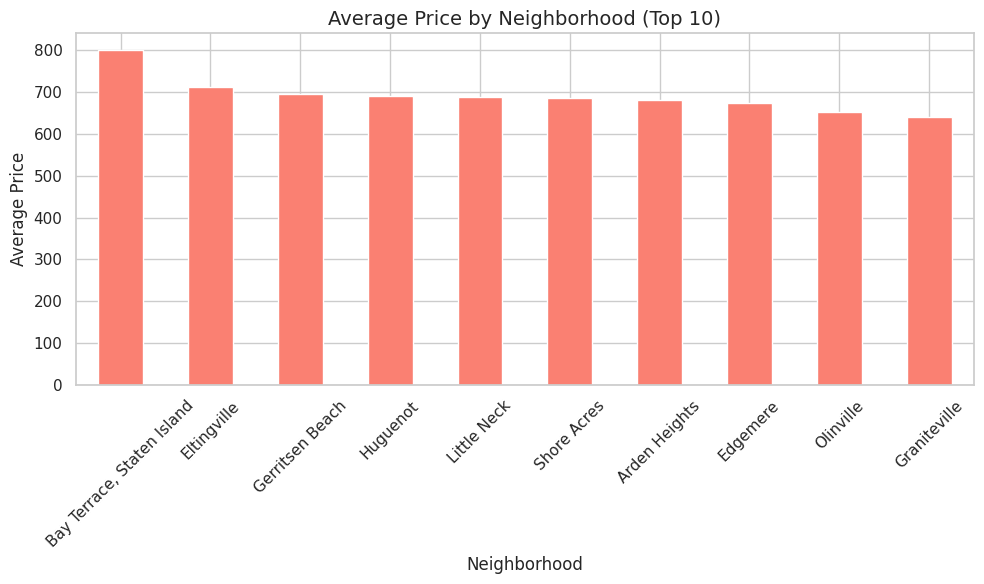

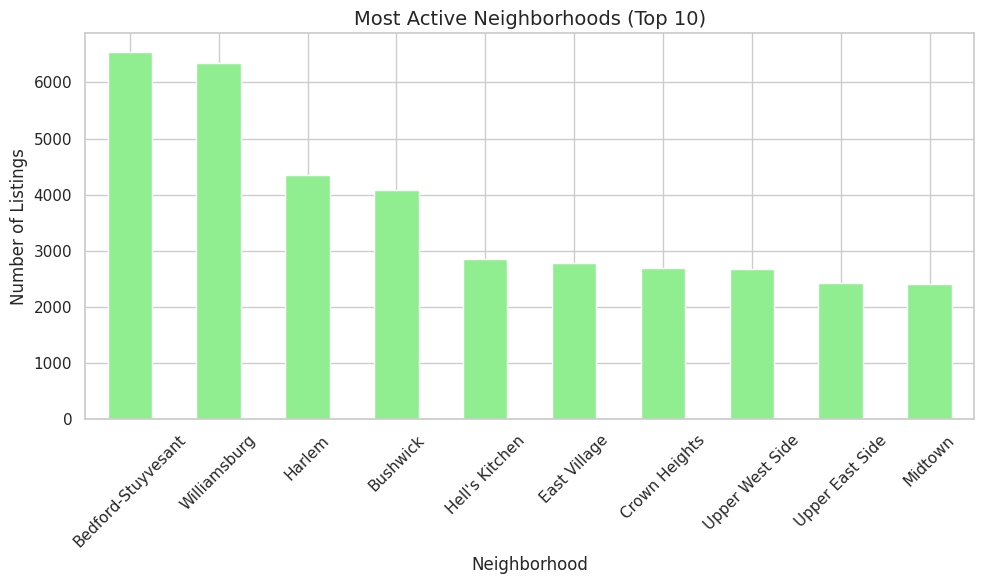

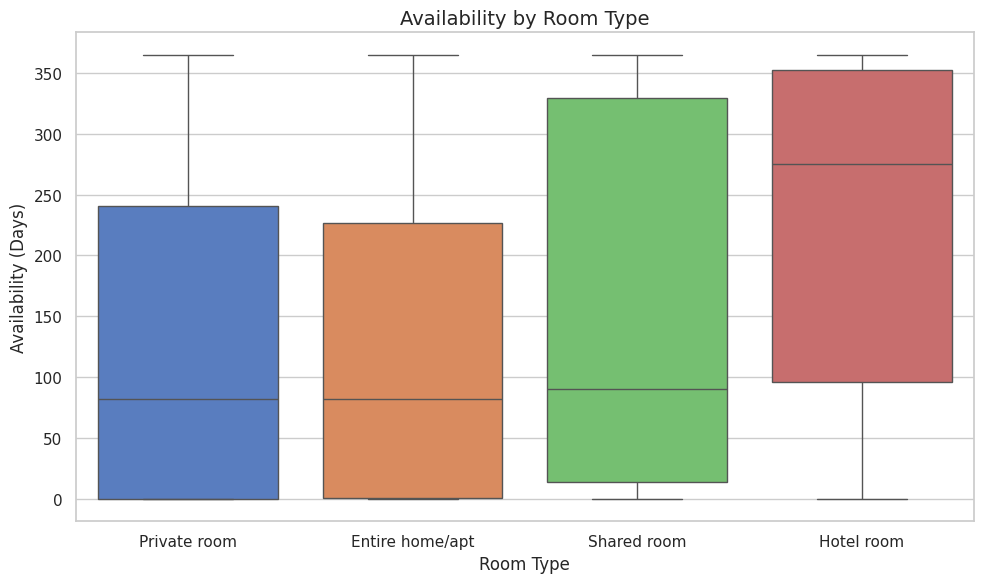

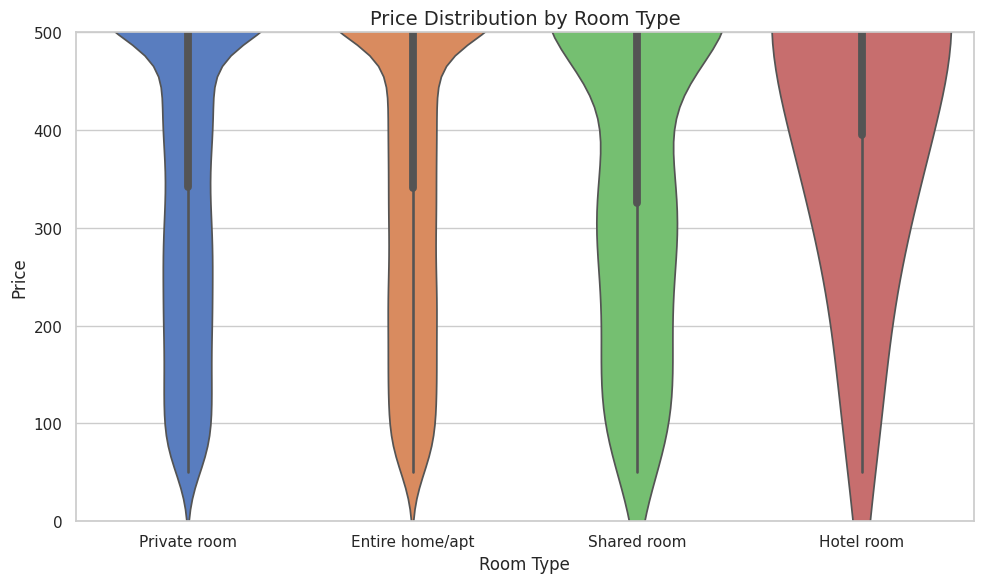

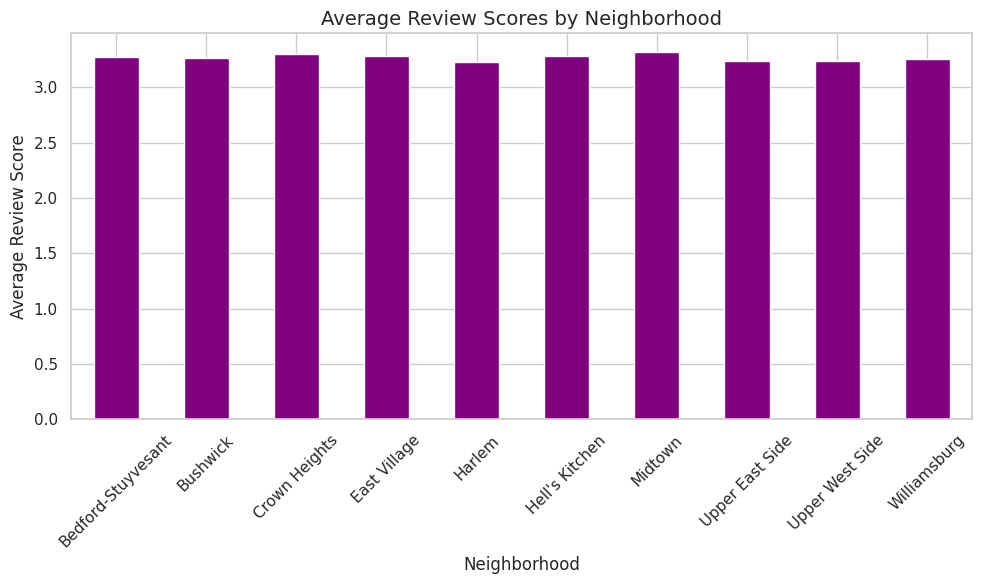

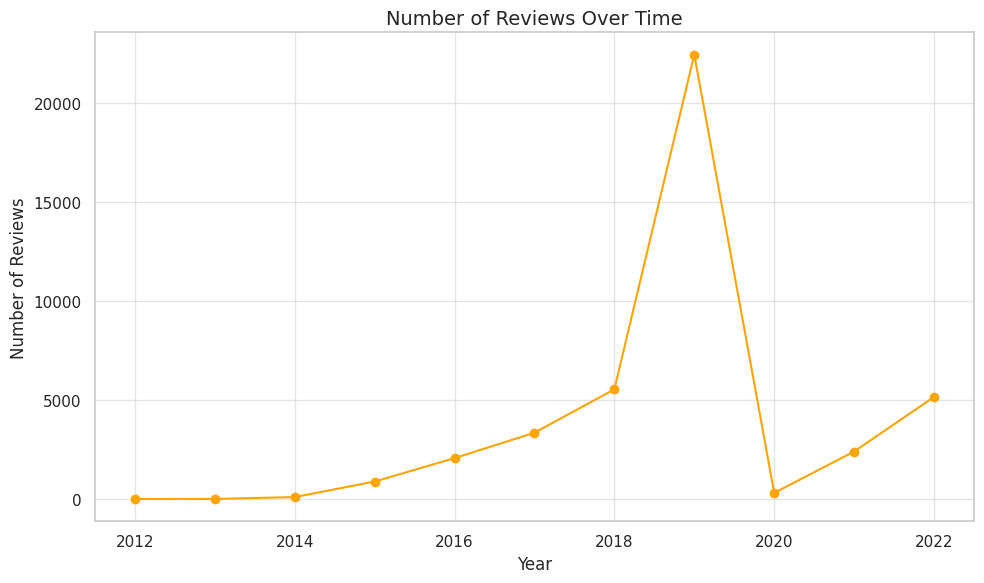

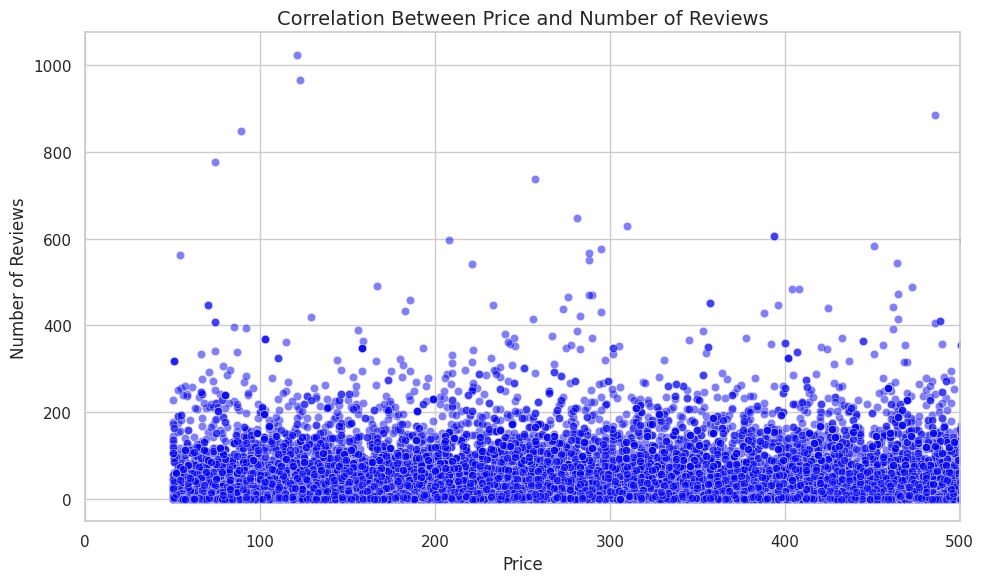

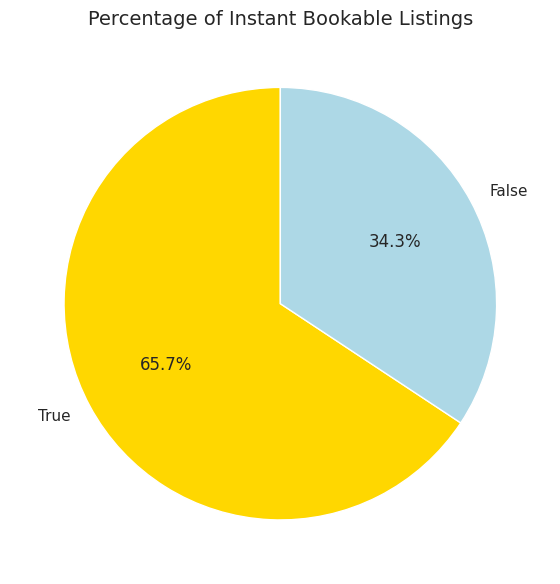

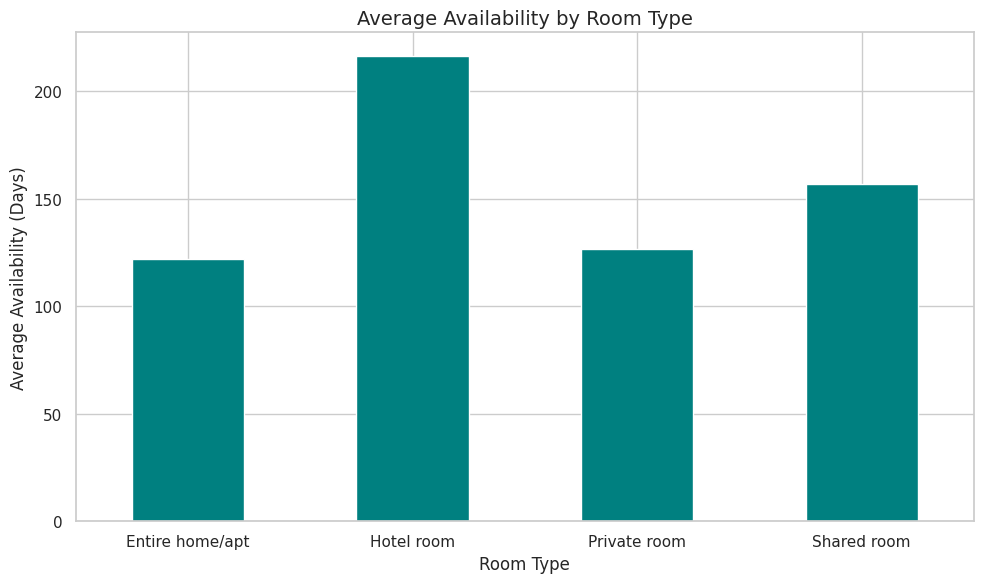

In [4]:

# Ensure appropriate plot style
sns.set_theme(style="whitegrid")

# Define figure size
plt.rcParams["figure.figsize"] = (10, 6)

# ----- Question 1: Which hosts have the highest number of listings? -----
plt.figure()
top_hosts = df['host id'].value_counts().head(10)
top_hosts.plot(kind="bar", color="skyblue")
plt.title("Top 10 Hosts by Number of Listings", fontsize=14)
plt.xlabel("Host ID", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Q1_top_hosts_listings.png")  # Bar Plot

# ----- Question 2: What is the average price for properties by neighborhood? -----
plt.figure()
avg_price_by_neighborhood = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
avg_price_by_neighborhood.plot(kind="bar", color="salmon")
plt.title("Average Price by Neighborhood (Top 10)", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Price", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Q2_avg_price_neighborhood.png")  # Bar Plot

# ----- Question 3: Which neighborhoods have the most active listings? -----
plt.figure()
most_active_neighborhoods = df['neighbourhood'].value_counts().head(10)
most_active_neighborhoods.plot(kind="bar", color="lightgreen")
plt.title("Most Active Neighborhoods (Top 10)", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Listings", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Q3_most_active_neighborhoods.png")  # Bar Plot

# ----- Question 4: How does availability vary by room type? -----
plt.figure()
sns.boxplot(x="room type", y="availability 365", data=df, palette="muted")
plt.title("Availability by Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Availability (Days)", fontsize=12)
plt.tight_layout()
plt.savefig("Q4_availability_room_type.png")  # Box Plot

# ----- Question 5: What is the distribution of prices across room types? -----
plt.figure()
sns.violinplot(x="room type", y="price", data=df, palette="muted", scale="count")
plt.title("Price Distribution by Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.ylim(0, 500)  # Limit to exclude extreme outliers
plt.tight_layout()
plt.savefig("Q5_price_distribution_room_type.png")  # Violin Plot

# ----- Question 6: How do review scores vary across neighborhoods? -----
plt.figure()
top_neighborhoods = df['neighbourhood'].value_counts().head(10).index
review_scores = df[df['neighbourhood'].isin(top_neighborhoods)].groupby('neighbourhood')['review rate number'].mean()
review_scores.plot(kind="bar", color="purple")
plt.title("Average Review Scores by Neighborhood", fontsize=14)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Average Review Score", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Q6_review_scores_neighborhood.png")  # Bar Plot

# ----- Question 7: How has the number of reviews changed over time? -----
plt.figure()
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['review_year'] = df['last review'].dt.year
reviews_over_time = df.groupby('review_year').size()
reviews_over_time.plot(kind="line", marker="o", color="orange")
plt.title("Number of Reviews Over Time", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.savefig("Q7_reviews_over_time.png")  # Line Plot

# ----- Question 8: What is the correlation between price and number of reviews? -----
plt.figure()
sns.scatterplot(x="price", y="number of reviews", data=df, alpha=0.5, color="blue")
plt.title("Correlation Between Price and Number of Reviews", fontsize=14)
plt.xlabel("Price", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)
plt.xlim(0, 500)  # Focus on relevant price range
plt.tight_layout()
plt.savefig("Q8_price_vs_reviews.png")  # Scatter Plot

# ----- Question 9: What percentage of listings use instant booking? -----
plt.figure()
instant_booking_counts = df['instant_bookable'].value_counts()
instant_booking_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["gold", "lightblue"])
plt.title("Percentage of Instant Bookable Listings", fontsize=14)
plt.ylabel("")  # Remove y-label for aesthetics
plt.tight_layout()
plt.savefig("Q9_instant_booking_percentage.png")  # Pie Chart

# ----- Question 10: Which room type has the highest availability on average? -----
plt.figure()
avg_availability_by_room = df.groupby("room type")["availability 365"].mean()
avg_availability_by_room.plot(kind="bar", color="teal")
plt.title("Average Availability by Room Type", fontsize=14)
plt.xlabel("Room Type", fontsize=12)
plt.ylabel("Average Availability (Days)", fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("Q10_avg_availability_room_type.png")  # Bar Plot

print("Visualizations created and saved.")
